# **Предсказание победителя в теннис**

In [538]:
import numpy as np
import pandas as pd
import datetime

In [539]:
# загружаем данные в диаппазоне 2000-2023

df_list = [pd.read_csv('/wta_matches_' + str(year) + '.csv') for year in range(2000,2023)]

In [540]:
# объединить вышеперечисленное в один фрейм данных
df = pd.concat(df_list, axis = 0)
df

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,20000430,1,201419,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,190.0,121.0,125.0,205.0
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,20000430,2,200085,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,1230.0,96.0,319.0
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,20001122,1,200652,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3255.0,48.0,661.0
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,20001122,2,200128,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5022.0,18.0,1398.0
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,20001121,1,200017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2132.0,54.0,610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2589,2022-W-FC-2022-QLS-M-ROU-POL-01,BJK Cup QLS R1: ROU vs POL,Hard,4,D,20220415,3,216347,NaN,NaN,...,21.0,7.0,1.0,6.0,0.0,6.0,1.0,6711.0,324.0,186.0
2590,2022-W-FC-2022-QLS-M-USA-UKR-01,BJK Cup QLS R1: USA vs UKR,Hard,4,D,20220415,1,201590,NaN,NaN,...,54.0,36.0,20.0,12.0,4.0,8.0,43.0,1201.0,93.0,709.0
2591,2022-W-FC-2022-QLS-M-USA-UKR-01,BJK Cup QLS R1: USA vs UKR,Hard,4,D,20220415,2,202468,NaN,NaN,...,29.0,16.0,3.0,7.0,2.0,7.0,14.0,2510.0,201.0,334.0
2592,2022-W-FC-2022-QLS-M-USA-UKR-01,BJK Cup QLS R1: USA vs UKR,Hard,4,D,20220415,3,215035,NaN,NaN,...,36.0,24.0,16.0,9.0,5.0,8.0,93.0,709.0,14.0,2510.0


In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63125 entries, 0 to 2593
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tourney_id          63125 non-null  object 
 1   tourney_name        63125 non-null  object 
 2   surface             63105 non-null  object 
 3   draw_size           63125 non-null  int64  
 4   tourney_level       63125 non-null  object 
 5   tourney_date        63125 non-null  int64  
 6   match_num           63125 non-null  int64  
 7   winner_id           63125 non-null  int64  
 8   winner_seed         26543 non-null  object 
 9   winner_entry        8058 non-null   object 
 10  winner_name         63125 non-null  object 
 11  winner_hand         63125 non-null  object 
 12  winner_ht           58981 non-null  float64
 13  winner_ioc          63125 non-null  object 
 14  winner_age          63117 non-null  float64
 15  loser_id            63125 non-null  int64  
 16  loser

In [596]:
df['surface']. value_counts ()

3.0    70094
1.0    34316
2.0    12042
0.0     2778
Name: surface, dtype: int64

In [543]:

pd.set_option('display.max_colwidth', 50)
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,20000430,1,201419,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,190.0,121.0,125.0,205.0
1,2000-D001,Fed Cup G1 PO: JPN vs CHN,Hard,4,D,20000430,2,200085,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,1230.0,96.0,319.0
2,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,20001122,1,200652,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3255.0,48.0,661.0
3,2000-D002,Fed Cup WG SF: USA vs BEL,Carpet,4,D,20001122,2,200128,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5022.0,18.0,1398.0
4,2000-D003,Fed Cup WG SF: CZE vs ESP,Carpet,4,D,20001121,1,200017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2132.0,54.0,610.0


In [544]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'winner_id', 'winner_seed', 'winner_entry',
       'winner_name', 'winner_hand', 'winner_ht', 'winner_ioc', 'winner_age',
       'loser_id', 'loser_seed', 'loser_entry', 'loser_name', 'loser_hand',
       'loser_ht', 'loser_ioc', 'loser_age', 'score', 'best_of', 'round',
       'minutes', 'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon',
       'w_SvGms', 'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt',
       'l_1stIn', 'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'winner_rank', 'winner_rank_points', 'loser_rank', 'loser_rank_points'],
      dtype='object')

In [545]:
df['minutes']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
        ...  
2589     52.0
2590    139.0
2591     64.0
2592     83.0
2593     97.0
Name: minutes, Length: 63125, dtype: float64

In [546]:
df['winner_seed']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
2589    NaN
2590    NaN
2591    NaN
2592    NaN
2593    NaN
Name: winner_seed, Length: 63125, dtype: object

In [547]:
import matplotlib.pyplot as plt
import seaborn as sns

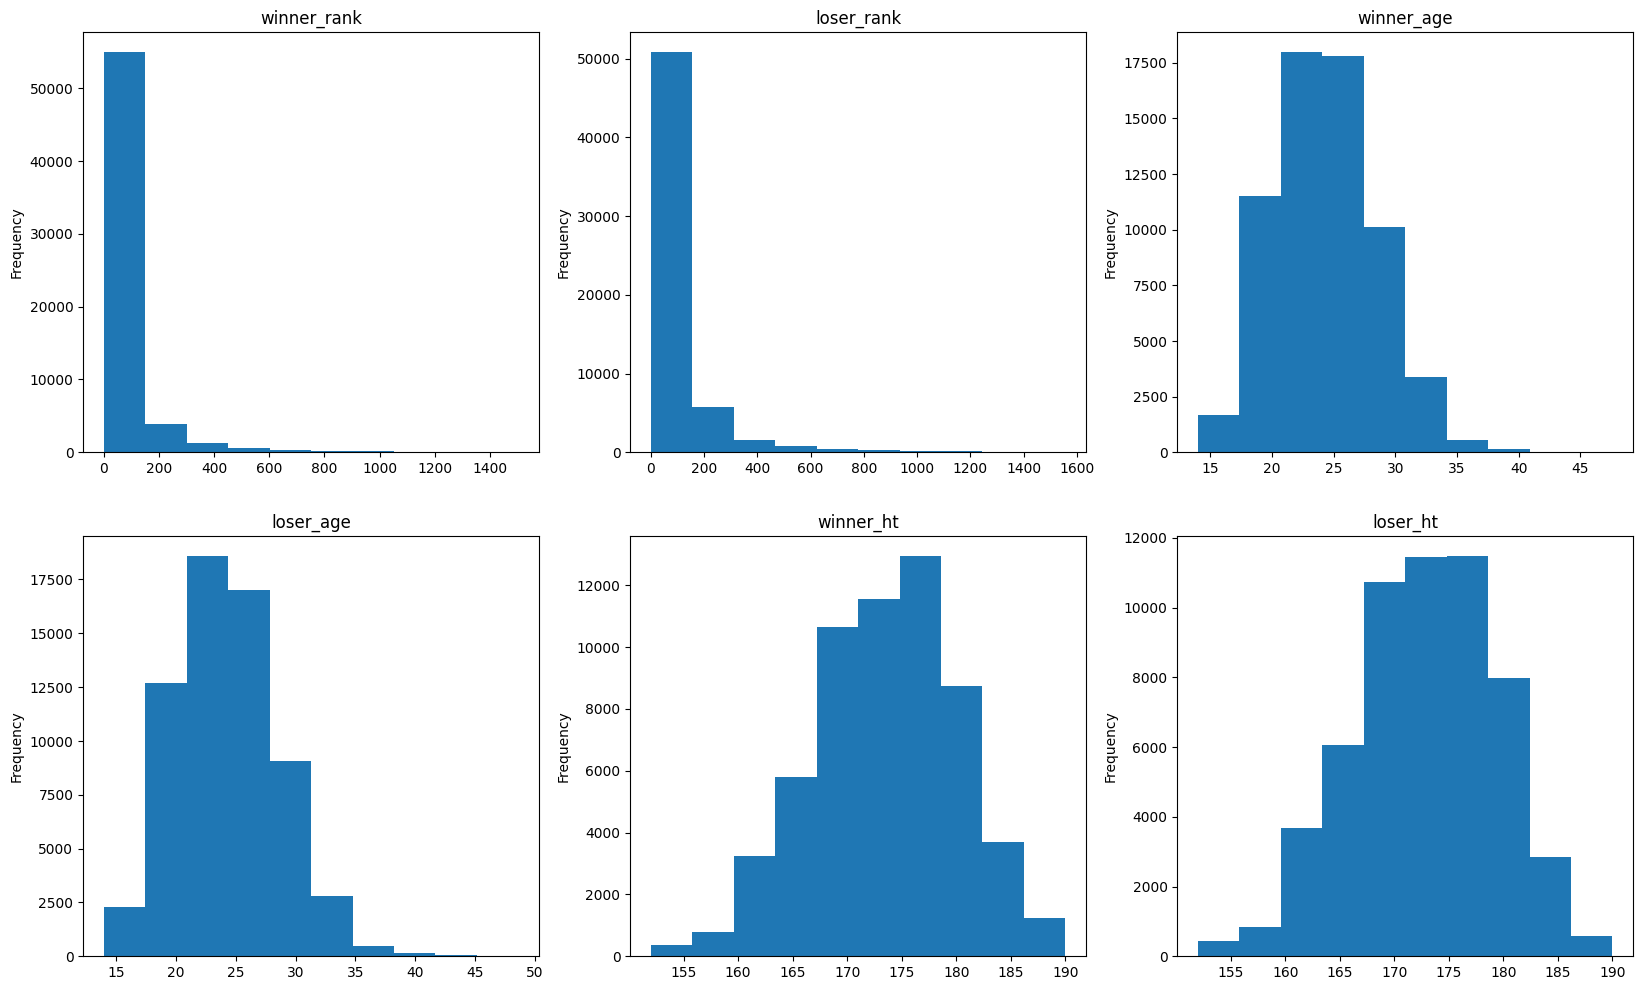

In [548]:
dimensions = ['winner_rank','loser_rank','winner_age','loser_age','winner_ht','loser_ht']

plt.figure(1, figsize=(20,12))

for i in range(1,7):
    plt.subplot(2,3,i)
    df[dimensions[i-1]].plot(kind='hist', title=dimensions[i-1])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f6d2b435130>,
 'caps': [<matplotlib.lines.Line2D at 0x7f6d2b435670>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f6d2b426e50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f6d2b435bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f6d2b435e50>],
 'means': []}

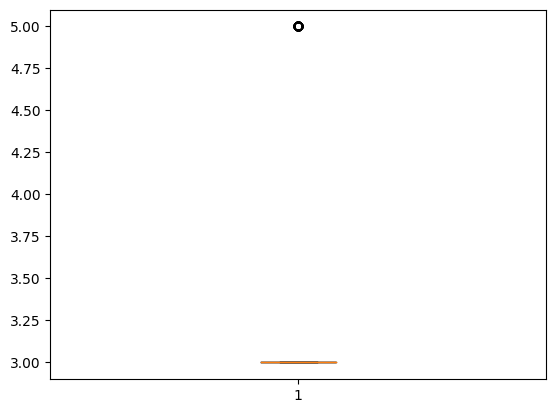

In [549]:
plt.boxplot(x=df['best_of'])

**Корреляционная матрица**

<ipython-input-550-e783989cae1f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


<Axes: >

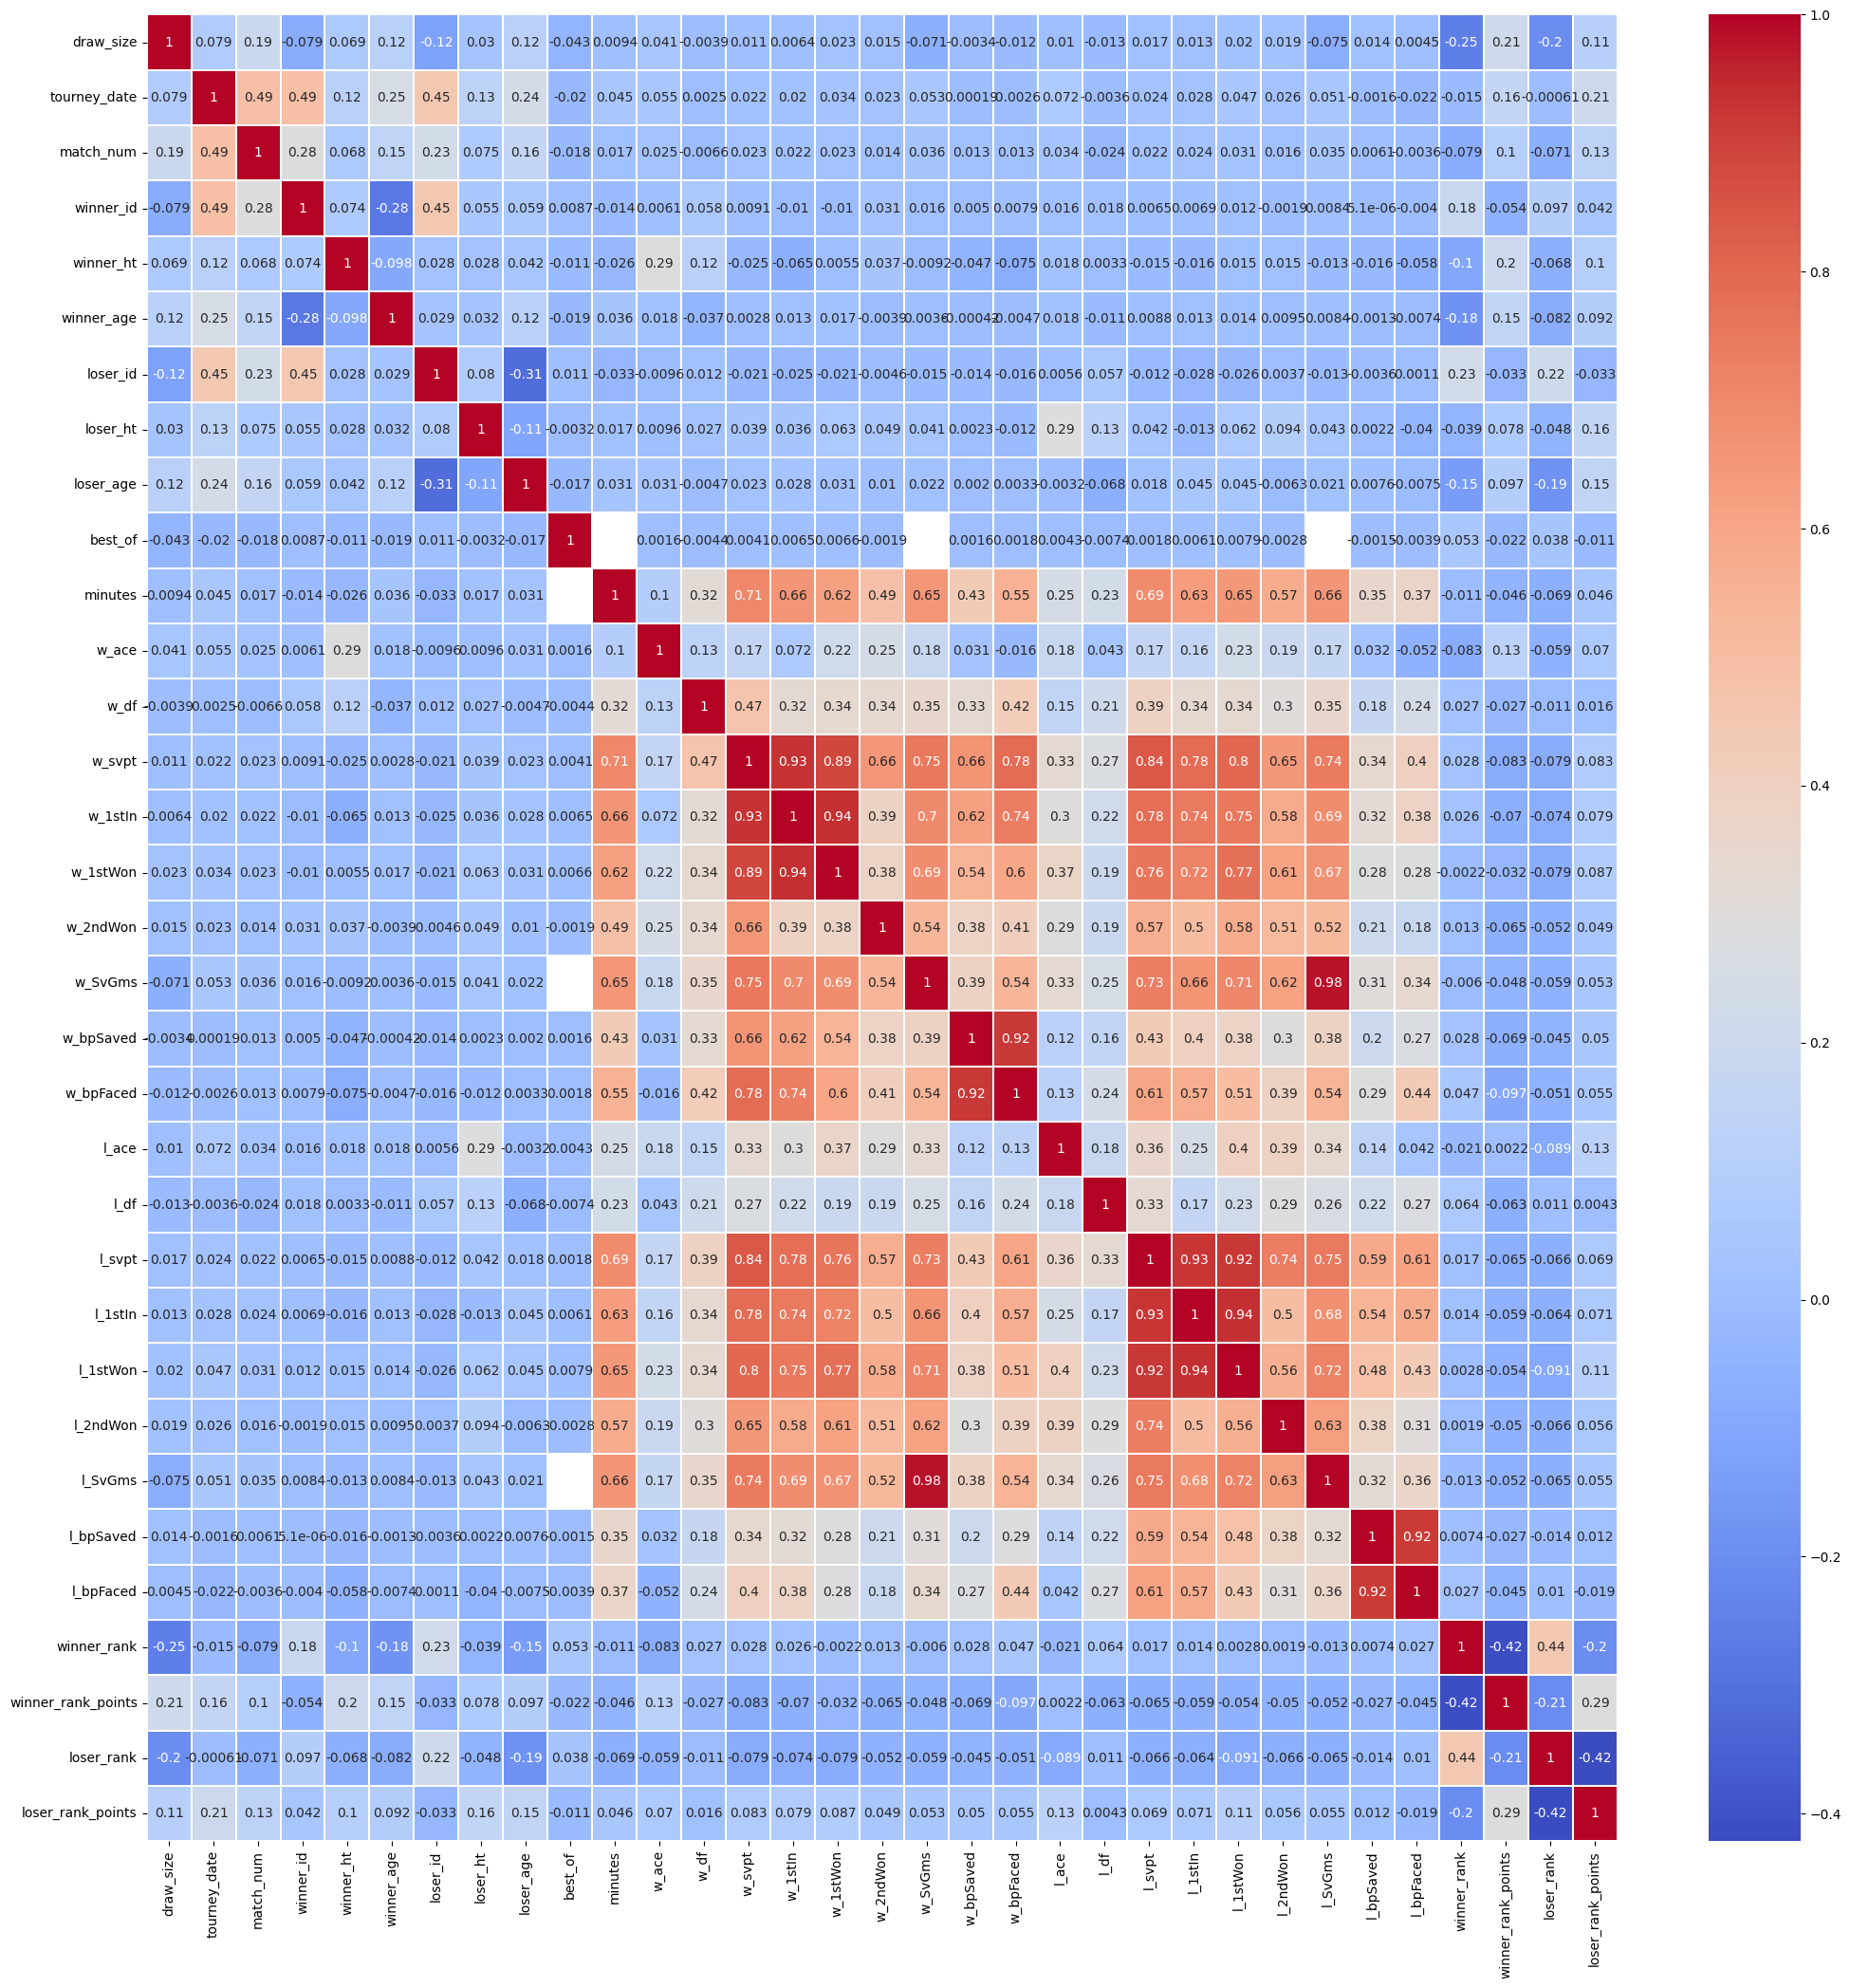

In [550]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot= True, linewidth=0.1, cmap= 'coolwarm')
# df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black'

**Предобработка**

In [551]:
df = df.drop(columns=['score','tourney_name','winner_name',
                      'loser_name','minutes', 'l_1stIn', 'l_1stWon', 'l_2ndWon','l_ace', 'l_svpt',
                      'l_SvGms','l_bpFaced','l_df', 'l_bpSaved',  'w_1stIn', 'w_1stWon','w_2ndWon', 'w_SvGms',
                      'w_ace', 'w_svpt','w_bpFaced', 'w_bpSaved','w_df'])
print("remained features ", df.columns)

remained features  Index(['tourney_id', 'surface', 'draw_size', 'tourney_level', 'tourney_date',
       'match_num', 'winner_id', 'winner_seed', 'winner_entry', 'winner_hand',
       'winner_ht', 'winner_ioc', 'winner_age', 'loser_id', 'loser_seed',
       'loser_entry', 'loser_hand', 'loser_ht', 'loser_ioc', 'loser_age',
       'best_of', 'round', 'winner_rank', 'winner_rank_points', 'loser_rank',
       'loser_rank_points'],
      dtype='object')


In [552]:
none_percent = df.isnull().sum() * 100 / len(df)
none_values_df = pd.DataFrame({'Feature name': df.columns, 'None values count': df.isnull().sum(),
                                 'None values percent': none_percent})
print(none_values_df.reset_index().drop(columns=['index']))

          Feature name  None values count  None values percent
0           tourney_id                  0             0.000000
1              surface                 20             0.031683
2            draw_size                  0             0.000000
3        tourney_level                  0             0.000000
4         tourney_date                  0             0.000000
5            match_num                  0             0.000000
6            winner_id                  0             0.000000
7          winner_seed              36582            57.951683
8         winner_entry              55067            87.234851
9          winner_hand                  0             0.000000
10           winner_ht               4144             6.564752
11          winner_ioc                  0             0.000000
12          winner_age                  8             0.012673
13            loser_id                  0             0.000000
14          loser_seed              48666            77

In [553]:
features_to_remove = none_values_df[none_values_df["None values percent"] > 79]
print(features_to_remove)
df = df.drop(columns=features_to_remove['Feature name'].values)

              Feature name  None values count  None values percent
winner_entry  winner_entry              55067            87.234851
loser_entry    loser_entry              50209            79.539010


In [554]:
df.dropna(subset=['winner_rank_points', 'loser_rank_points','winner_rank','loser_rank', 'surface'], inplace=True)
df = df.reset_index(drop=True)
df

,tourney_id,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_hand,winner_ht,...,loser_hand,loser_ht,loser_ioc,loser_age,best_of,round,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2000-D001,Hard,4,D,20000430,1,201419,NaN,R,172.0,...,R,170.0,JPN,23.8,3,RR,190.0,121.0,125.0,205.0
1,2000-D001,Hard,4,D,20000430,2,200085,NaN,R,163.0,...,R,168.0,CHN,26.1,3,RR,22.0,1230.0,96.0,319.0
2,2000-D002,Carpet,4,D,20001122,1,200652,NaN,L,178.0,...,R,167.0,BEL,18.4,3,RR,4.0,3255.0,48.0,661.0
3,2000-D002,Carpet,4,D,20001122,2,200128,NaN,R,189.0,...,R,175.0,BEL,17.4,3,RR,2.0,5022.0,18.0,1398.0
4,2000-D003,Carpet,4,D,20001121,1,200017,NaN,R,168.0,...,R,171.0,CZE,17.7,3,RR,9.0,2132.0,54.0,610.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59700,2022-W-FC-2022-QLS-M-ROU-POL-01,Hard,4,D,20220415,3,216347,NaN,R,176.0,...,U,NaN,ROU,22.1,3,RR,1.0,6711.0,324.0,186.0
59701,2022-W-FC-2022-QLS-M-USA-UKR-01,Hard,4,D,20220415,1,201590,NaN,R,173.0,...,R,175.0,UKR,21.9,3,RR,43.0,1201.0,93.0,709.0
59702,2022-W-FC-2022-QLS-M-USA-UKR-01,Hard,4,D,20220415,2,202468,NaN,R,170.0,...,R,173.0,UKR,22.1,3,RR,14.0,2510.0,201.0,334.0
59703,2022-W-FC-2022-QLS-M-USA-UKR-01,Hard,4,D,20220415,3,215035,NaN,R,175.0,...,R,170.0,USA,28.1,3,RR,93.0,709.0,14.0,2510.0


In [555]:
none_percent = df.isnull().sum() * 100 / len(df)
none_values_df = pd.DataFrame({'Feature name': df.columns, 'None values count': df.isnull().sum(),
                                 'None values percent': none_percent})
print(none_values_df.reset_index().drop(columns=['index']))

          Feature name  None values count  None values percent
0           tourney_id                  0             0.000000
1              surface                  0             0.000000
2            draw_size                  0             0.000000
3        tourney_level                  0             0.000000
4         tourney_date                  0             0.000000
5            match_num                  0             0.000000
6            winner_id                  0             0.000000
7          winner_seed              33413            55.963487
8          winner_hand                  0             0.000000
9            winner_ht               2039             3.415124
10          winner_ioc                  0             0.000000
11          winner_age                  0             0.000000
12            loser_id                  0             0.000000
13          loser_seed              45349            75.955113
14          loser_hand                  0             0

In [556]:
df.tourney_date

0        20000430
1        20000430
2        20001122
3        20001122
4        20001121
           ...   
59700    20220415
59701    20220415
59702    20220415
59703    20220415
59704    20220415
Name: tourney_date, Length: 59705, dtype: int64

In [557]:

df = df.drop(columns=['tourney_date'])

In [558]:
df = df.rename(columns={"loser_age": "first_age", "loser_entry": "first_entry", "loser_hand": "first_hand",
                        "loser_ht": "first_ht", "loser_id": "first_id", "loser_ioc": "first_ioc",
                        "loser_rank": "first_rank", "loser_rank_points": "first_rank_points",
                        "loser_seed": "first_seed",
                
                        "winner_age": "second_age", "winner_entry": "second_entry","winner_hand": "second_hand",
                        "winner_ht": "second_ht", "winner_id": "second_id", "winner_ioc": "second_ioc",
                        "winner_rank": "second_rank", "winner_rank_points": "second_rank_points",
                        "winner_seed": "second_seed",
                       },)

In [559]:
copy_2_df = df.copy()
copy_2_df[[ 'first_age','first_hand','first_ht','first_id','first_ioc','first_rank','first_rank_points','first_seed',
            'second_age','second_hand','second_ht','second_id','second_ioc','second_rank','second_rank_points','second_seed']]\
=copy_2_df[['second_age','second_hand','second_ht','second_id','second_ioc','second_rank','second_rank_points','second_seed',
             'first_age','first_hand','first_ht','first_id','first_ioc','first_rank','first_rank_points','first_seed']]

In [560]:
winner_player2 = np.zeros(df.shape[0]) # second player wins so label=0
df['label'] = winner_player2


winner_player1 = np.ones(copy_2_df.shape[0]) # first player wins so label=1
copy_2_df['label'] = winner_player1 

df = pd.concat([df,copy_2_df])
#shuffle data
df = df.sample(frac=1).reset_index(drop=True)
df

,tourney_id,surface,draw_size,tourney_level,match_num,second_id,second_seed,second_hand,second_ht,second_ioc,...,first_ht,first_ioc,first_age,best_of,round,second_rank,second_rank_points,first_rank,first_rank_points,label
0,2001-W-T3-LUX-01A-2001,Hard,30,T3,4,200064,3.0,R,158.0,RSA,...,173.0,GER,28.4,3,R32,17.0,1517.0,67.0,547.0,0.0
1,2004-W-T1-RUS-01A-2004,Carpet,28,T1,11,200700,NaN,R,172.0,ITA,...,166.0,ITA,24.3,3,R32,20.0,1280.0,21.0,1265.0,1.0
2,2004-W-T1-SUI-01A-2004,Hard,28,T1,19,201355,NaN,R,172.0,ITA,...,163.0,JPN,29.2,3,R16,40.0,764.0,14.0,1837.0,1.0
3,2013-W-SL-FRA-01A-2013,Clay,128,G,11,201517,NaN,R,180.0,SVK,...,175.0,FRA,27.3,3,R128,52.0,1136.0,99.0,683.0,0.0
4,2005-W-T2-USA-01A-2005,Clay,56,T2,33,201329,6.0,R,172.0,RUS,...,173.0,CHN,19.2,3,R32,10.0,2217.0,49.0,664.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119405,2001-W-T3-ESP-01A-2001,Clay,30,T3,22,200094,NaN,R,173.0,GER,...,168.0,ESP,29.4,3,R16,53.0,596.0,13.0,1738.0,1.0
119406,2019-0466,Clay,32,I,284,202434,NaN,R,163.0,SRB,...,NaN,ITA,22.2,3,R32,103.0,606.0,354.0,120.0,0.0
119407,2004-W-T4-NZL-01A-2004,Hard,32,T4,6,200022,NaN,R,171.0,SUI,...,166.0,CZE,21.8,3,R32,61.0,568.0,64.0,552.0,0.0
119408,2010-W-INT-GBR-01A-2010,Grass,56,I,3,201595,NaN,L,159.0,JPN,...,173.0,GER,22.3,3,R64,165.0,350.0,57.0,1128.0,1.0


33

In [561]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelBinarizer

from sklearn.model_selection import train_test_split
from sklearn import utils
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.metrics import log_loss


In [562]:
hand_encoder = LabelEncoder()
df['first_hand'] = hand_encoder.fit_transform(df['first_hand'].astype(str))
df['second_hand'] = hand_encoder.transform(df['second_hand'].astype(str))

df['first_ioc'] = LabelEncoder().fit_transform(df['first_ioc'].astype(str))
df['second_ioc'] = LabelEncoder().fit_transform(df['second_ioc'].astype(str))

df['surface'] = LabelEncoder().fit_transform(df['surface'].astype(str))
df['tourney_level'] = LabelEncoder().fit_transform(df['tourney_level'].astype(str))
df['tourney_id'] = LabelEncoder().fit_transform(df['tourney_id'].astype(str))
df['round'] = LabelEncoder().fit_transform(df['round'].astype(str))

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119410 entries, 0 to 119409
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          119410 non-null  int64  
 1   surface             119410 non-null  int64  
 2   draw_size           119410 non-null  int64  
 3   tourney_level       119410 non-null  int64  
 4   match_num           119410 non-null  int64  
 5   second_id           119410 non-null  int64  
 6   second_seed         40648 non-null   object 
 7   second_hand         119410 non-null  int64  
 8   second_ht           113171 non-null  float64
 9   second_ioc          119410 non-null  int64  
 10  second_age          119410 non-null  float64
 11  first_id            119410 non-null  int64  
 12  first_seed          40648 non-null   object 
 13  first_hand          119410 non-null  int64  
 14  first_ht            113171 non-null  float64
 15  first_ioc           119410 non-nul

переделать

In [563]:
# numeric_columns = ['winner_rank', 'loser_rank', 'winner_age', 'loser_age', 'winner_ht', 'loser_ht']
# df[numeric_columns] = df[numeric_columns].astype(float)

In [564]:
df['second_seed'].unique()

array([3.0, nan, 6.0, 7.0, 16.0, 1.0, '8', 28.0, 4.0, 2.0, 5.0, '3', 13.0,
       8.0, 31.0, 17.0, 26.0, 11.0, 14.0, 10.0, 29.0, '1', 15.0, 12.0,
       9.0, 21.0, 22.0, 24.0, 'WC', '2', '32', 20.0, '5', 23.0, 19.0,
       '12', '9', 27.0, '27', 18.0, 30.0, '31', '21', '7', 25.0, 32.0,
       '19', '16', '14', '23', '25', '6', '10', '24', '30', '15', '11',
       '26', '4', 'Q', '28', '13', '20', '22', '17', '29', 33.0, 'LL',
       '18', '33', 34.0], dtype=object)

In [565]:
df['second_seed'].value_counts()['LL']

8

In [566]:
df = df[(df.first_seed != 'Q')]
df = df[(df.second_seed != 'Q')]
df = df[(df.first_seed != 'LL')]
df = df[(df.second_seed != 'LL')]
df = df[(df.first_seed != 'WC')]
df = df[(df.second_seed != 'WC')]

In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119230 entries, 0 to 119409
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   tourney_id          119230 non-null  int64  
 1   surface             119230 non-null  int64  
 2   draw_size           119230 non-null  int64  
 3   tourney_level       119230 non-null  int64  
 4   match_num           119230 non-null  int64  
 5   second_id           119230 non-null  int64  
 6   second_seed         40515 non-null   object 
 7   second_hand         119230 non-null  int64  
 8   second_ht           113032 non-null  float64
 9   second_ioc          119230 non-null  int64  
 10  second_age          119230 non-null  float64
 11  first_id            119230 non-null  int64  
 12  first_seed          40515 non-null   object 
 13  first_hand          119230 non-null  int64  
 14  first_ht            113032 non-null  float64
 15  first_ioc           119230 non-nul

In [568]:
numeric_columns = ['first_seed', 'second_seed']
df[numeric_columns] = df[numeric_columns].astype(float)

In [569]:
df['surface']. value_counts ()

3    70094
1    34316
2    12042
0     2778
Name: surface, dtype: int64

In [570]:
 df['second_seed'] = df['second_seed']. fillna (65)
 df['first_seed'] = df['first_seed']. fillna (65)

In [571]:
df_imputed = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(df))
df_imputed.columns = df.columns
df_imputed.index = df.index
df = df_imputed.copy()

In [572]:
df['second_seed']. value_counts ()

65.0    78715
1.0      4166
2.0      3817
3.0      3619
4.0      3524
5.0      3414
6.0      3245
7.0      3237
8.0      3210
9.0      1293
10.0      977
12.0      887
13.0      855
14.0      850
11.0      847
15.0      833
16.0      817
17.0      414
19.0      353
18.0      346
21.0      346
20.0      337
23.0      304
26.0      296
22.0      294
25.0      293
24.0      285
30.0      285
28.0      281
27.0      278
29.0      268
31.0      254
32.0      249
33.0       40
34.0        1
Name: second_seed, dtype: int64

<Axes: >

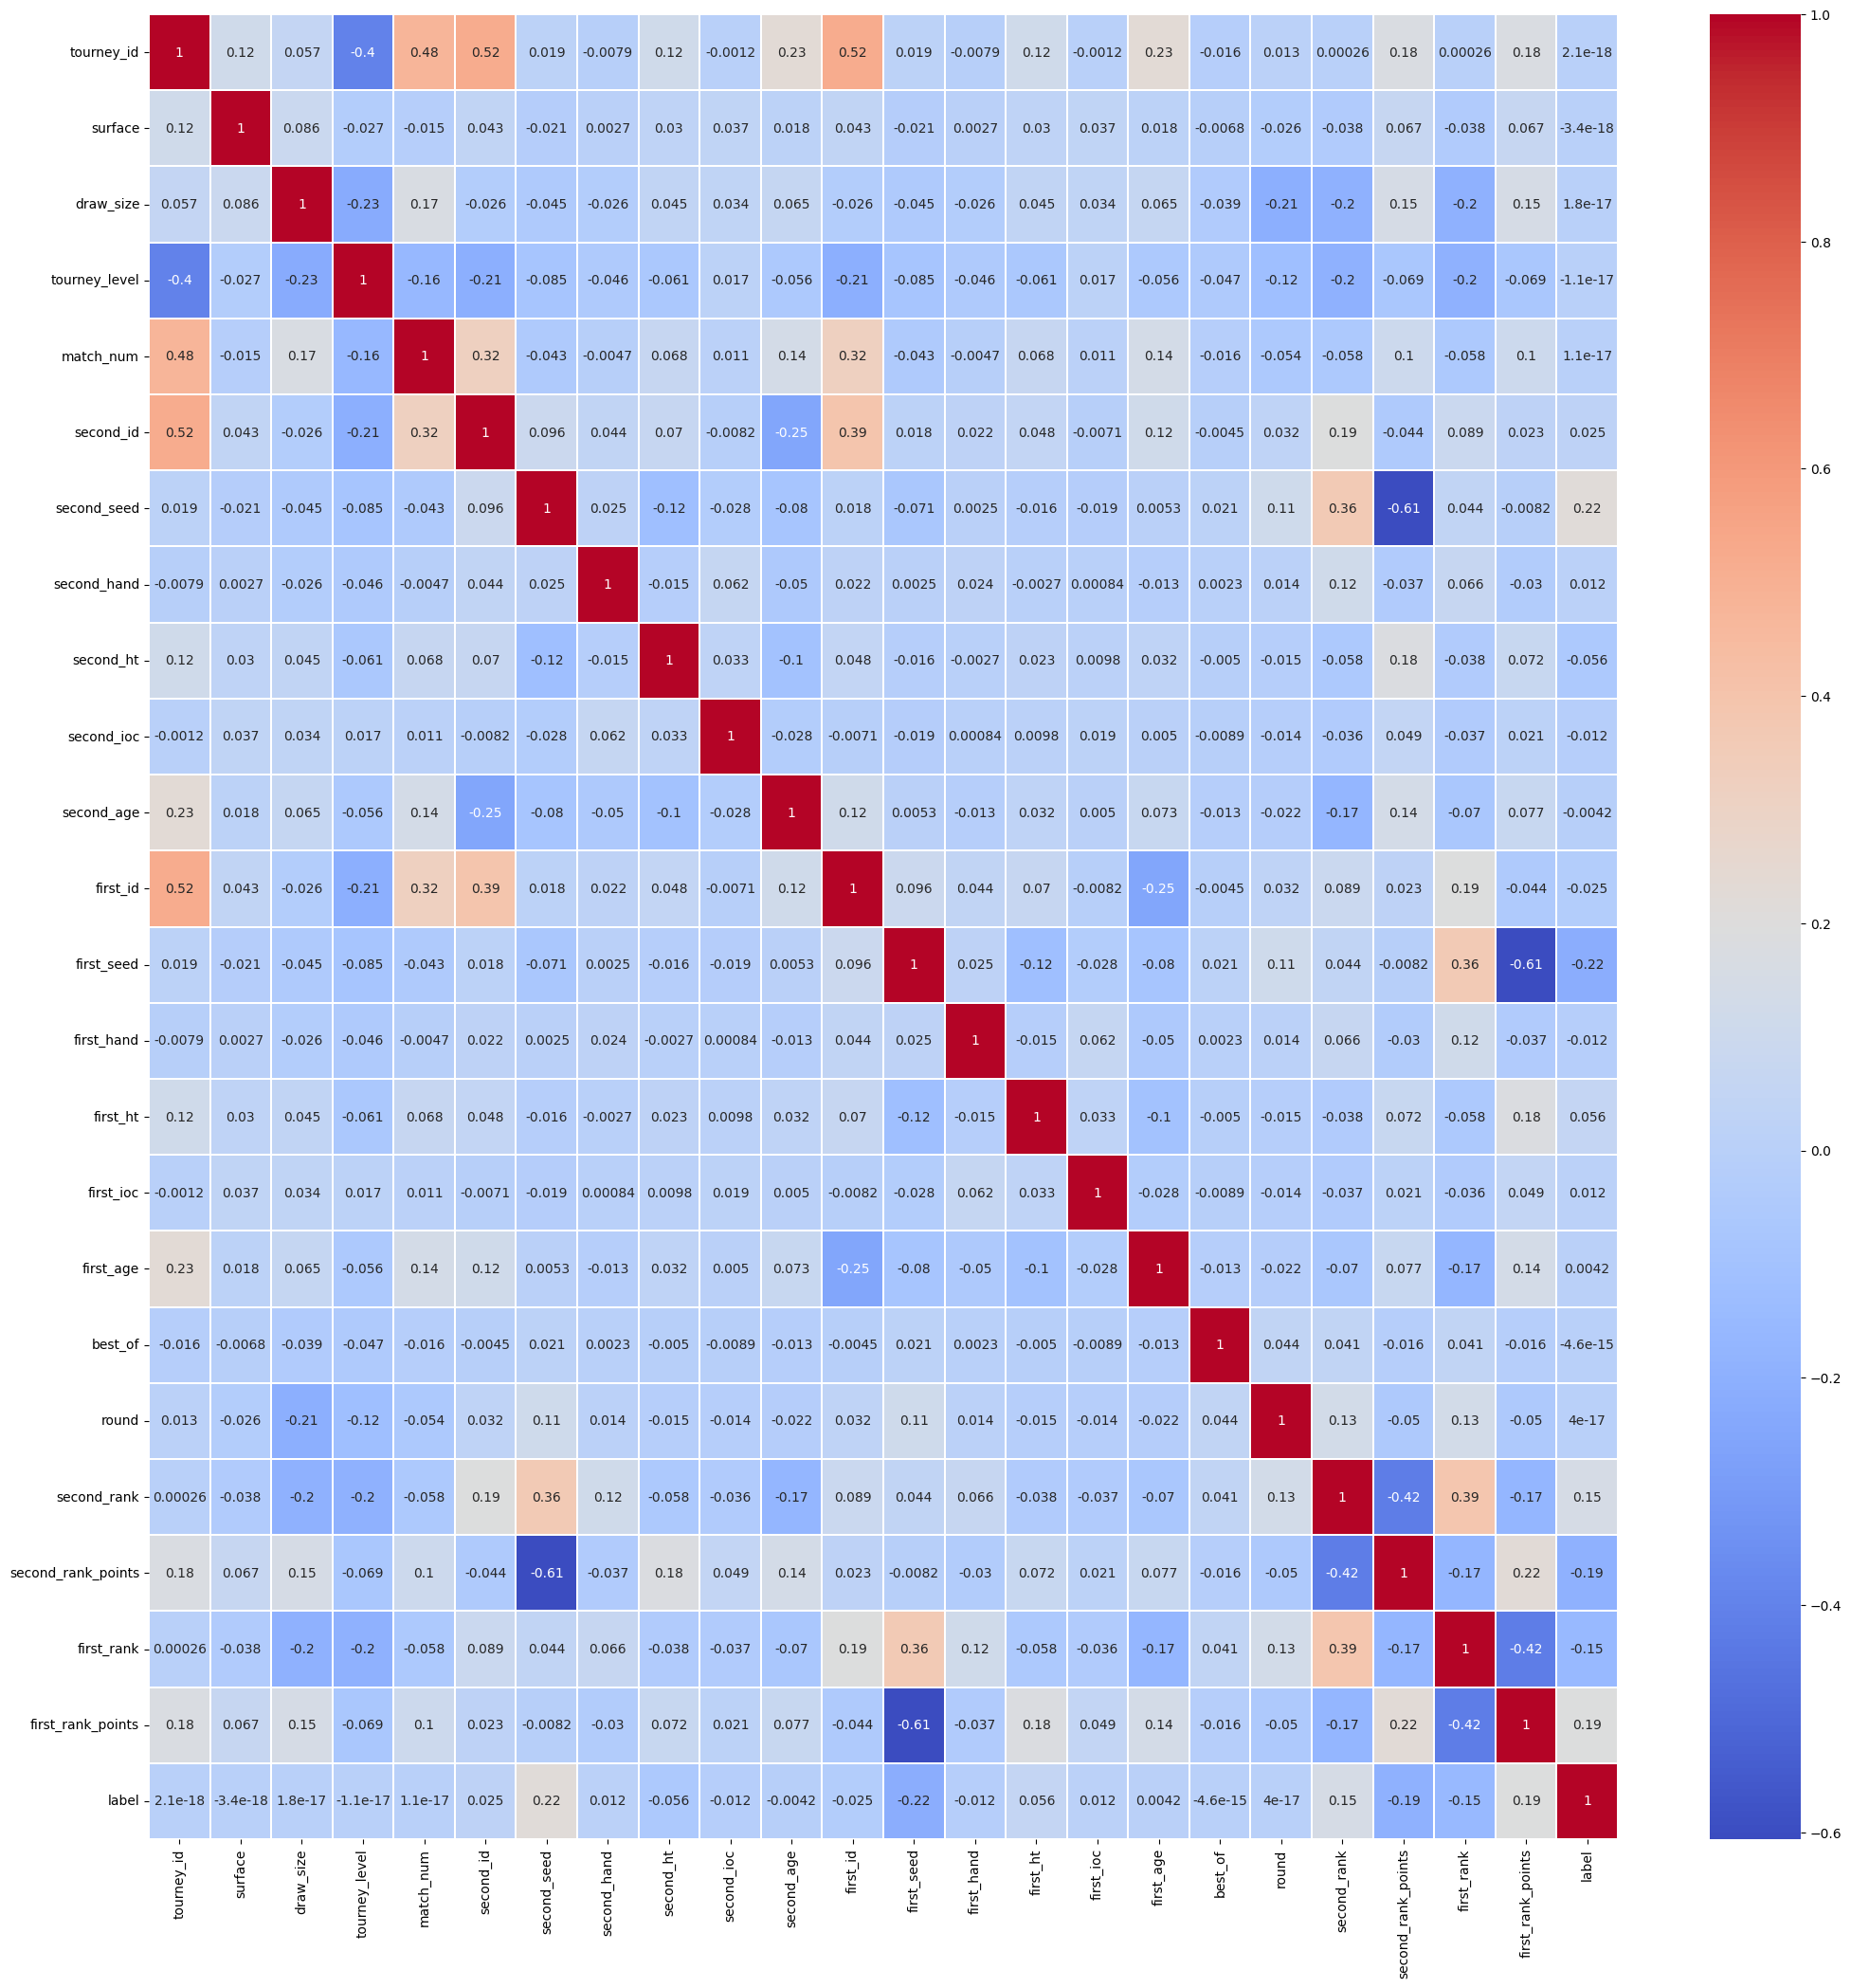

In [573]:
correlation_matrix = df.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot= True, linewidth=0.1, cmap= 'coolwarm')
# df_new.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black'

In [574]:
print('Final shape of data after cleaning and preprocessing: ', df.shape)

Final shape of data after cleaning and preprocessing:  (119230, 24)


# **Предсказательные модели**

In [575]:
df['label']

0         0.0
1         1.0
2         1.0
3         0.0
4         0.0
         ... 
119405    1.0
119406    0.0
119407    0.0
119408    1.0
119409    1.0
Name: label, Length: 119230, dtype: float64

In [576]:
y = df['label']
df_X = df.drop(columns='label')

In [577]:
# делим данные : 80% для обучения и 20% для теста.
X_train, X_test, y_train, y_test = train_test_split(df_X, y, test_size=0.2)

**RandomForest**

In [578]:
#Call the classifier
RF_classifier = RandomForestClassifier(n_estimators=100)
#fit the data
RF_classifier.fit(X_train, y_train)
#predict 
RF_predictions = RF_classifier.predict(X_test)

In [579]:
print('Confusion matrix')
print(confusion_matrix(y_test,RF_predictions))
print('Classification report')
print(classification_report(y_test,RF_predictions))
print('Accuracy= ', accuracy_score(y_test, RF_predictions))

Confusion matrix
[[7945 3988]
 [4288 7625]]
Classification report
              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66     11933
         1.0       0.66      0.64      0.65     11913

    accuracy                           0.65     23846
   macro avg       0.65      0.65      0.65     23846
weighted avg       0.65      0.65      0.65     23846

Accuracy=  0.6529396963851379


In [580]:
print(RF_classifier)
print(RF_classifier.score(X_train, y_train))
print(RF_classifier.score(X_test, y_test)) # Improvement on baseline, slight overfitting?

RandomForestClassifier()
1.0
0.6529396963851379


**XGBoost**

In [581]:
#Call the classifier
XGB_classifier = XGBClassifier()
#fit the data
XGB_classifier.fit(X_train, y_train)
#predict 
XGB_predictions = XGB_classifier.predict(X_test)

In [582]:
print('Confusion matrix')
print(confusion_matrix(y_test,XGB_predictions))
print('Classification report')
print(classification_report(y_test,XGB_predictions))
print('Accuracy= ', accuracy_score(y_test, XGB_predictions))

Confusion matrix
[[7942 3991]
 [4048 7865]]
Classification report
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.66     11933
         1.0       0.66      0.66      0.66     11913

    accuracy                           0.66     23846
   macro avg       0.66      0.66      0.66     23846
weighted avg       0.66      0.66      0.66     23846

Accuracy=  0.6628784701836786


In [583]:
print(XGB_classifier)
print(XGB_classifier.score(X_train, y_train))
print(XGB_classifier.score(X_test, y_test)) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
0.7249958064245576
0.6628784701836786


In [584]:
X_train_log = X_train.copy()
X_train_log = pd.get_dummies(X_train_log, drop_first = True)

X_test_log = X_test.copy()
X_test_log = pd.get_dummies(X_test_log, drop_first = True)

**LogisticRegression**

In [585]:
from sklearn.linear_model import LogisticRegression

In [586]:
#Call the classifier
logit_classifier = LogisticRegression(solver='liblinear')
#fit the data
logit_classifier.fit(X_train, y_train)
#predict 
logit_predictions = logit_classifier.predict(X_test)

In [587]:
print('Confusion matrix')
print(confusion_matrix(y_test,logit_predictions))
print('Classification report')
print(classification_report(y_test,logit_predictions))
print('Accuracy= ', accuracy_score(y_test, logit_predictions))

Confusion matrix
[[7873 4060]
 [4087 7826]]
Classification report
              precision    recall  f1-score   support

         0.0       0.66      0.66      0.66     11933
         1.0       0.66      0.66      0.66     11913

    accuracy                           0.66     23846
   macro avg       0.66      0.66      0.66     23846
weighted avg       0.66      0.66      0.66     23846

Accuracy=  0.6583494087058627


In [588]:
print(logit_classifier)
print(logit_classifier.score(X_train, y_train))
print(logit_classifier.score(X_test, y_test)) 
print('Logloss= ', log_loss(y_test, logit_predictions))

LogisticRegression(solver='liblinear')
0.6570074645642875
0.6583494087058627
Logloss=  12.314335492792813


**GradientBoosting**

In [589]:
from sklearn.ensemble import GradientBoostingClassifier

In [590]:
#Call the classifier
gbc_classifier = GradientBoostingClassifier(max_features = 'sqrt')
#fit the data
gbc_classifier.fit(X_train, y_train)
#predict 
gbc_predictions = gbc_classifier.predict(X_test)

In [591]:
print('Confusion matrix')
print(confusion_matrix(y_test,gbc_predictions))
print('Classification report')
print(classification_report(y_test,gbc_predictions))
print('Accuracy= ', accuracy_score(y_test, gbc_predictions))
print('Logloss= ', log_loss(y_test, gbc_predictions))

Confusion matrix
[[7995 3938]
 [4186 7727]]
Classification report
              precision    recall  f1-score   support

         0.0       0.66      0.67      0.66     11933
         1.0       0.66      0.65      0.66     11913

    accuracy                           0.66     23846
   macro avg       0.66      0.66      0.66     23846
weighted avg       0.66      0.66      0.66     23846

Accuracy=  0.6593139310576197
Logloss=  12.279570583460025


In [592]:
print(gbc_classifier)
print(gbc_classifier.score(X_train, y_train))
print(gbc_classifier.score(X_test, y_test)) # Improvement on baseline, slight overfitting?

GradientBoostingClassifier(max_features='sqrt')
0.6639268640442841
0.6593139310576197


In [593]:
mask1 = (df['first_rank'] < df['second_rank']) & (df['label'] == 1)
mask2 = (df['second_rank'] < df['first_rank']) & (df['label'] == 0)

df[mask1 | mask2].shape[0] / df.shape[0]

# 65.63% матчей выигрывают игроки боллее высокого ранга. Это будет базовым ориентиром для моделей.

0.6563616539461545

**Выгрузка данных для приложения**

In [594]:
X_train_log.to_pickle('/content/app/X_train_log.data')
df.to_pickle('/content/app/df.data')
y_train.to_pickle('/content/app/y_train.data')
